In [9]:
from matplotlib.pylab import plt
import numpy as np
import pickle
from PIL import Image

In [24]:
def ReadImage(path):
    img = Image.open(path)
    c_img = img.convert("P")
    palette = c_img.getpalette()
    a_img = np.array(c_img)
    return a_img,palette
def img_to_txt(I):
    sh = I.shape
    im = I.flatten()
    T = ''
    for i in im:
        T += chr(int(i))
    return T,sh

def txt_to_img(T,sh):
    M = []
    for i in T:
        M.append(ord(i))
    return np.array(M).reshape(sh)
def codage_LZW(M):
    w = ""
    code = []
    dict_size = 256
    D = {chr(i): i for i in range(dict_size)}
    for c in M:
        wc = w + c
        if wc in D:
            w = wc
        else:
            code.append(D[w])
            D[wc] = dict_size
            dict_size += 1
            w = c
    if w:
        code.append(D[w])
    return code
def decodage_LZW(M):
    dict_size = 256
    D = {i: chr(i) for i in range(dict_size)}
    w = chr(M[0])
    M = M[1:]
    code = w
    e = w
    for i in M:
        if i in D.keys():
            e = D[i]
        elif i == dict_size:
            e = w + w[0]
        code += e
        D[dict_size] = w + e[0]
        dict_size += 1
        w = e
    return code
def LZW_img(I,op):
    if op == "decodage":
        i_img = txt_to_img(decodage_LZW(I[770:]),I[:2])
        c_img = Image.fromarray(i_img.astype(np.uint8),"P")
        c_img.putpalette(I[2:770].tolist())
        return c_img.convert("RGB",palette=I[2:770].tolist())
    elif op == "codage":
        C = img_to_txt(I[0])
        CC = []
        CC.extend(C[1])
        CC.extend(I[1])
        CC.extend(codage_LZW(C[0]))
        return np.array(CC)
    else :
        return "choix n'exeite pas"

In [11]:
img = ReadImage("sample_1920×1280.bmp")
L = LZW_img(img,"codage")

In [12]:
L

array([  1280,   1920,      0, ..., 449621, 298540, 309411])

In [13]:
with open("hh.irm",'ab') as op:
    op.write(L.tobytes())

In [14]:
with open("hh.irm",'rb') as op:
    res = np.frombuffer(op.read(),dtype=int)

In [15]:
res

array([  1280,   1920,      0, ..., 449621, 298540, 309411])

In [40]:
d_img_test = np.array(LZW_img(res,"decodage"))
plt.imshowd_img_test)

array([[[153, 153, 153],
        [204, 102, 153],
        [153, 153, 153],
        ...,
        [102, 102, 102],
        [153,  51, 102],
        [102, 102, 102]],

       [[204, 153, 153],
        [153, 102, 102],
        [204, 153, 153],
        ...,
        [153, 102, 102],
        [102, 102, 153],
        [153, 102, 102]],

       [[153, 102, 153],
        [153, 153, 153],
        [153, 102, 102],
        ...,
        [102,  51, 102],
        [153, 102, 102],
        [102, 102, 102]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  51],
        ...,
        [ 51,  51,   0],
        [102,  51,   0],
        [153, 153,  51]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,  51,   0],
        ...,
        [153, 153,  51],
        [153, 204,  51],
        [153, 153, 102]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  51],
        ...,
        [153, 153,  51],
        [102, 153,   0],
        [102,  51,   0]]

In [31]:
i_img = Image.open("sample_1920×1280.bmp")

In [39]:
np.array(i_img)

array([[[175, 129, 140],
        [181, 135, 146],
        [176, 130, 141],
        ...,
        [121,  83, 108],
        [128,  85, 113],
        [133,  90, 118]],

       [[181, 135, 146],
        [175, 129, 140],
        [174, 128, 139],
        ...,
        [122,  84, 109],
        [125,  85, 112],
        [129,  86, 114]],

       [[173, 127, 138],
        [169, 123, 134],
        [171, 125, 136],
        ...,
        [125,  87, 112],
        [127,  87, 114],
        [127,  87, 114]],

       ...,

       [[  8,   7,  12],
        [  4,   3,   8],
        [  9,   9,  11],
        ...,
        [ 29,  37,   0],
        [ 88,  94,   4],
        [142, 149,  54]],

       [[  9,   9,  11],
        [  1,   1,   3],
        [ 10,  10,  12],
        ...,
        [148, 157,  48],
        [171, 179,  68],
        [159, 167,  55]],

       [[  7,   7,   9],
        [  0,   0,   2],
        [  6,   6,   8],
        ...,
        [149, 160,  40],
        [124, 134,  12],
        [ 69,  79,   0]]

In [27]:
np.mean((i_img-d_img_test)**2)

86.49839762369791

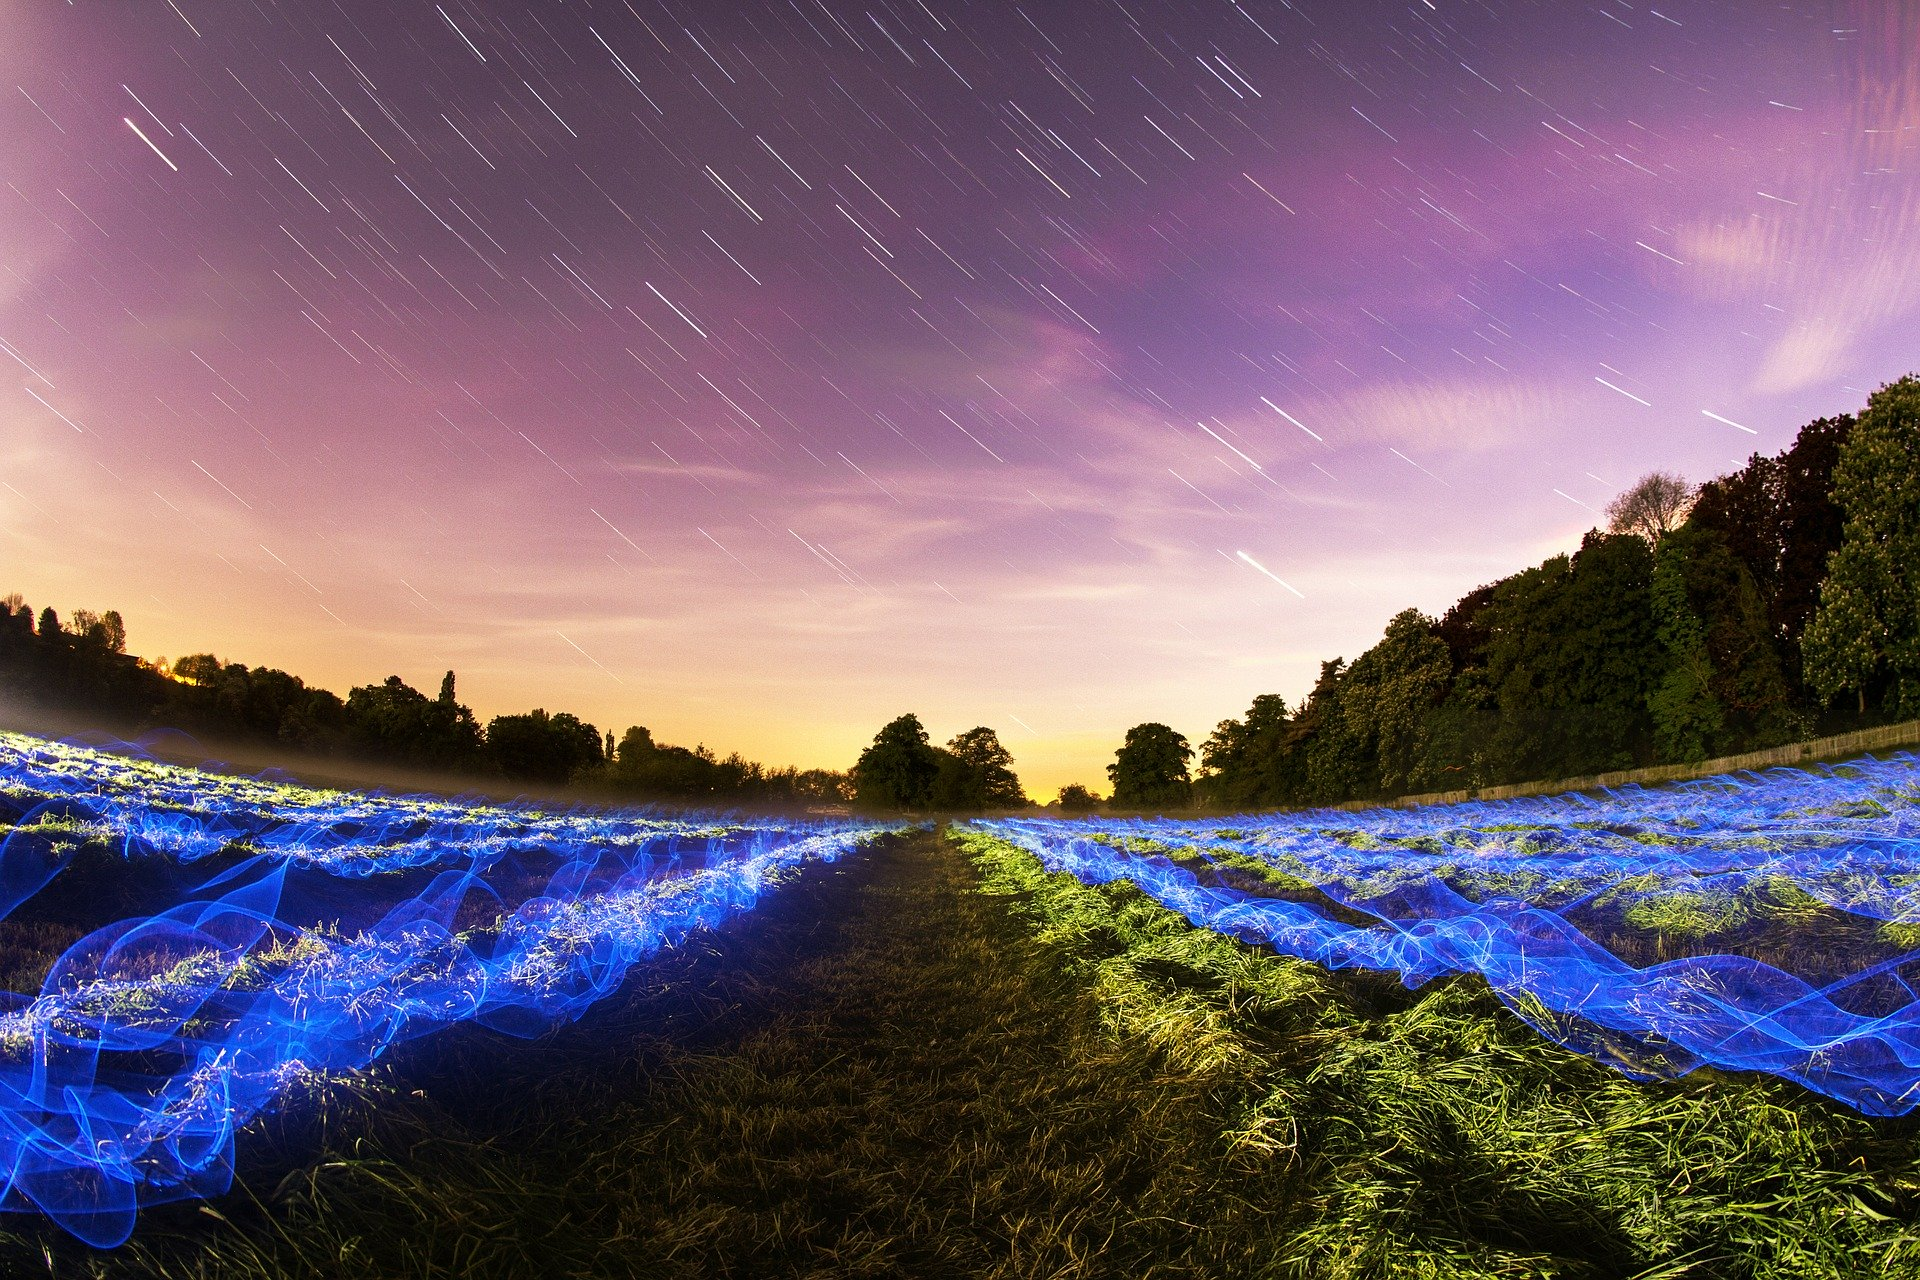

In [33]:
i_img

In [34]:
d_img_test

array([[[153, 153, 153],
        [204, 102, 153],
        [153, 153, 153],
        ...,
        [102, 102, 102],
        [153,  51, 102],
        [102, 102, 102]],

       [[204, 153, 153],
        [153, 102, 102],
        [204, 153, 153],
        ...,
        [153, 102, 102],
        [102, 102, 153],
        [153, 102, 102]],

       [[153, 102, 153],
        [153, 153, 153],
        [153, 102, 102],
        ...,
        [102,  51, 102],
        [153, 102, 102],
        [102, 102, 102]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  51],
        ...,
        [ 51,  51,   0],
        [102,  51,   0],
        [153, 153,  51]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,  51,   0],
        ...,
        [153, 153,  51],
        [153, 204,  51],
        [153, 153, 102]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  51],
        ...,
        [153, 153,  51],
        [102, 153,   0],
        [102,  51,   0]]